In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def get_range(data, min_sep = 24, max_sep=9999999):
    diff = data[:,1] - data[:,0]
    return np.where((diff >= min_sep) & (diff <= max_sep))[0]

def get_bounds(data, lb, ub):
    return np.where((data[:,0] >= lb) & (data[:,0] <= ub) & (data[:,1] >= lb) & (data[:,1] <= ub))

In [3]:
def get_subset(file, lb=1, ub=99999999999999999999):
    xl = np.loadtxt(file,usecols=(7,8,11),delimiter=',',dtype=bytes,skiprows=1).astype(str)

    xl = xl[np.where(xl[:,2] == 'TRUE')[0]] # use only Target-Target matches
    xl = xl[:,:2].astype(int)

    xl = np.array([sorted(row) for row in xl if row[0] != row[1]]) # residue position with i < j; remove self-loops
#     print(xl,lb,ub)
    xl = xl[get_bounds(xl,lb,ub)]

    print("short: %d medium: %d long: %d" % (get_range(xl,min_sep=1,max_sep=11).shape[0],get_range(xl,min_sep=12,max_sep=23).shape[0],get_range(xl).shape[0]))

    xl = xl[get_range(xl,min_sep=12,max_sep=9999999999)]
#     if args.renumber:
    xl[:,:2] -= lb - 1
    return xl

In [4]:
ground_truth = 'MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKALVLIAFAQYLQQCPFEDHVKLVNEVTEFAKTCVADESAENCDKSLHTLFGDKLCTVATLRETYGEMADCCAKQEPERNECFLQHKDDNPNLPRLVRPEVDVMCTAFHDNEETFLKKYLYEIARRHPYFYAPELLFFAKRYKAAFTECCQAADKAACLLPKLDELRDEGKASSAKQRLKCASLQKFGERAFKAWAVARLSQRFPKAEFAEVSKLVTDLTKVHTECCHGDLLECADDRADLAKYICENQDSISSKLKECCEKPLLEKSHCIAEVENDEMPADLPSLAADFVESKDVCKNYAEAKDVFLGMFLYEYARRHPDYSVVLLLRLAKTYETTLEKCCAAADPHECYAKVFDEFKPLVEEPQNLIKQNCELFEQLGEYKFQNALLVRYTKKVPQVSTPTLVEVSRNLGKVGSKCCKHPEAKRMPCAEDYLSVVLNQLCVLHEKTPVSDRVTKCCTESLVNRRPCFSALEVDETYVPKEFNAETFTFHADICTLSEKERQIKKQTALVELVKHKPKATKEQLKAVMDDFAAFVEKCCKADDKETCFAEEGKKLVAASQAALGL'

In [5]:
full = 'SEVAHRFKDLGEENFKALVLIAFAQYLQQCPFEDHVKLVNEVTEFAKTCVADESAENCDKSLHTLFGDKLCTVATLRETYGEMADCCAKQEPERNECFLQHKDDNPNLPRLVRPEVDVMCTAFHDNEETFLKKYLYEIARRHPYFYAPELLFFAKRYKAAFTECCQAADKAACLLPKLDELRDEGKASSAKQRLKCASLQKFGERAFKAWAVARLSQRFPKAEFAEVSKLVTDLTKVHTECCHGDLLECADDRADLAKYICENQDSISSKLKECCEKPLLEKSHCIAEVENDEMPADLPSLAADFVESKDVCKNYAEAKDVFLGMFLYEYARRHPDYSVVLLLRLAKTYETTLEKCCAAADPHECYAKVFDEFKPLVEEPQNLIKQNCELFEQLGEYKFQNALLVRYTKKVPQVSTPTLVEVSRNLGKVGSKCCKHPEAKRMPCAEDYLSVVLNQLCVLHEKTPVSDRVTKCCTESLVNRRPCFSALEVDETYVPKEFNAETFTFHADICTLSEKERQIKKQTALVELVKHKPKATKEQLKAVMDDFAAFVEKCCKADDKETCFAEEGKKLVAASQAA'
domainA = 'SEVAHRFKDLGEENFKALVLIAFAQYLQQCPFEDHVKLVNEVTEFAKTCVADESAENCDKSLHTLFGDKLCTVATLRETYGEMADCCAKQEPERNECFLQHKDDNPNLPRLVRPEVDVMCTAFHDNEETFLKKYLYEIARRHPYFYAPELLFFAKRYKAAFTECCQAADKAACLLPKLDELRDEGKASSAKQRLKCA'
domainB = 'SLQKFGERAFKAWAVARLSQRFPKAEFAEVSKLVTDLTKVHTECCHGDLLECADDRADLAKYICENQDSISSKLKECCEKPLLEKSHCIAEVENDEMPADLPSLAADFVESKDVCKNYAEAKDVFLGMFLYEYARRHPDYSVVLLLRLAKTYETTLEKCCAAADPHECYAKVFDEFKPLVEEPQNLIKQ'
domainC = 'NCELFEQLGEYKFQNALLVRYTKKVPQVSTPTLVEVSRNLGKVGSKCCKHPEAKRMPCAEDYLSVVLNQLCVLHEKTPVSDRVTKCCTESLVNRRPCFSALEVDETYVPKEFNAETFTFHADICTLSEKERQIKKQTALVELVKHKPKATKEQLKAVMDDFAAFVEKCCKADDKETCFAEEGKKLVAASQAA'

In [6]:
ground_truth.find(full)

28

In [7]:
offsetFull = ground_truth.find(full)
offsetA = ground_truth.find(domainA)
offsetB = ground_truth.find(domainB)
offsetC = ground_truth.find(domainC)

In [8]:
ground_truth[offsetA:len(domainA)+offsetA] == domainA

True

In [9]:
xl20Full = get_subset('20PercentFDR_xiFDR0.csv',offsetFull,len(full)+offsetFull-1)
xl20A = get_subset('20PercentFDR_xiFDR0.csv',offsetA,len(domainA)+offsetA-1)
xl20B = get_subset('20PercentFDR_xiFDR0.csv',offsetB,len(domainB)+offsetB-1)
xl20C = get_subset('20PercentFDR_xiFDR0.csv',offsetC,len(domainC)+offsetC-1)
xl50Full = get_subset('50PercentFDR_xiFDR0.csv',offsetFull,len(full)+offsetFull-1)
xl50A = get_subset('50PercentFDR_xiFDR0.csv',offsetA,len(domainA)+offsetA-1)
xl50B = get_subset('50PercentFDR_xiFDR0.csv',offsetB,len(domainB)+offsetB-1)
xl50C = get_subset('50PercentFDR_xiFDR0.csv',offsetC,len(domainC)+offsetC-1)
xl100Full = get_subset('100PercentFDR_xiFDR0.csv',offsetFull,len(full)+offsetFull-1)
xl100A = get_subset('100PercentFDR_xiFDR0.csv',offsetA,len(domainA)+offsetA-1)
xl100B = get_subset('100PercentFDR_xiFDR0.csv',offsetB,len(domainB)+offsetB-1)
xl100C = get_subset('100PercentFDR_xiFDR0.csv',offsetC,len(domainC)+offsetC-1)

short: 371 medium: 104 long: 604
short: 154 medium: 43 long: 170
short: 68 medium: 18 long: 39
short: 137 medium: 20 long: 127
short: 798 medium: 257 long: 2029
short: 292 medium: 96 long: 383
short: 158 medium: 54 long: 100
short: 316 medium: 62 long: 288
short: 911 medium: 889 long: 16673
short: 323 medium: 288 long: 1863
short: 206 medium: 215 long: 1142
short: 350 medium: 297 long: 1875


In [10]:
contactsFull = np.loadtxt('1ao6.contacts')
distancesFull = { tuple(row[:2]) : row[2] for row in contactsFull }
contactsA = np.loadtxt('1ao6A.contacts')
distancesA = { tuple(row[:2]) : row[2] for row in contactsA }
contactsB = np.loadtxt('1ao6B.contacts')
distancesB = { tuple(row[:2]) : row[2] for row in contactsB }
contactsC = np.loadtxt('1ao6C.contacts')
distancesC = { tuple(row[:2]) : row[2] for row in contactsC }

In [11]:
xl100A.shape

(2151, 2)

In [12]:
dist_xl20Full = np.array([distancesFull[tuple(row[:2])] for row in xl20Full])
dist_xl20A = np.array([distancesA[tuple(row[:2])] for row in xl20A])
dist_xl20B = np.array([distancesB[tuple(row[:2])] for row in xl20B])
dist_xl20C = np.array([distancesC[tuple(row[:2])] for row in xl20C])
dist_xl50Full = np.array([distancesFull[tuple(row[:2])] for row in xl50Full])
dist_xl50A = np.array([distancesA[tuple(row[:2])] for row in xl50A])
dist_xl50B = np.array([distancesB[tuple(row[:2])] for row in xl50B])
dist_xl50C = np.array([distancesC[tuple(row[:2])] for row in xl50C])
dist_xl100Full = np.array([distancesFull[tuple(row[:2])] for row in xl100Full])
dist_xl100A = np.array([distancesA[tuple(row[:2])] for row in xl100A])
dist_xl100B = np.array([distancesB[tuple(row[:2])] for row in xl100B])
dist_xl100C = np.array([distancesC[tuple(row[:2])] for row in xl100C])

In [16]:
np.sum(dist_xl20Full < 25) / len(dist_xl20Full)

0.71610169491525422

In [14]:
np.sum(dist_xl20Full < 25) / len(dist_xl20Full)

0.71610169491525422

<Container object of 2286 artists>

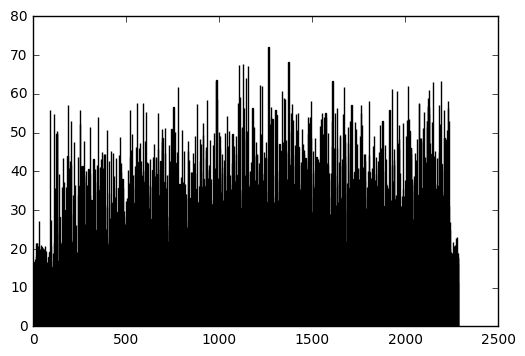

In [97]:
plt.bar(np.arange(len(dist_xl50Full)),dist_xl50Full)

In [106]:
np.sum(dist_xl50Full > 35) / np.sum(dist_xl50Full > 25)

0.53812056737588654

In [82]:
np.sum(dist_xl50A < 25) / len(dist_xl50A)

0.76200417536534448

<Container object of 479 artists>

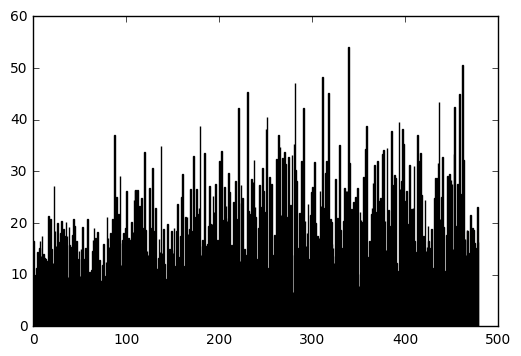

In [83]:
plt.bar(np.arange(len(dist_xl50A)),dist_xl50A)

<Container object of 154 artists>

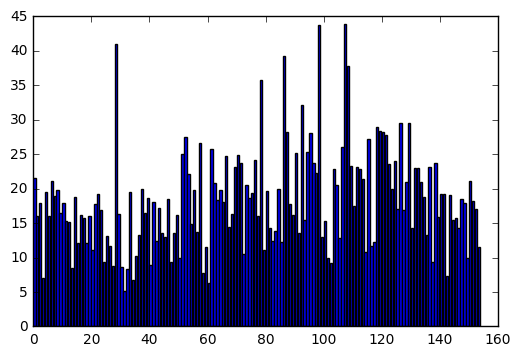

In [84]:
plt.bar(np.arange(len(dist_xl50B)),dist_xl50B)

In [76]:
np.sum(dist_xl20B < 25) / len(dist_xl20B)

0.96491228070175439

<Container object of 2172 artists>

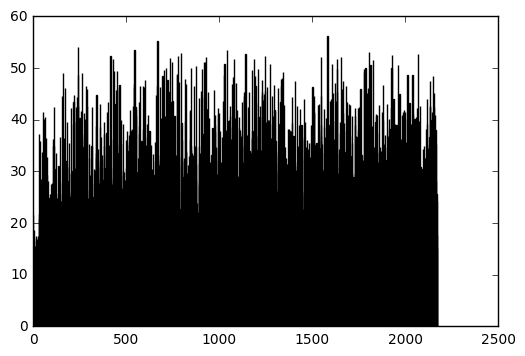

In [86]:
plt.bar(np.arange(len(dist_xl100C)),dist_xl100C)

In [75]:
np.sum(dist_xl20C < 25) / len(dist_xl20C)

0.8571428571428571

In [59]:
xl20A

array([[132, 159],
       [ 42,  70],
       [131, 158],
       [132, 158],
       [150, 196],
       [128, 158],
       [128, 159],
       [ 14, 159],
       [ 14, 158],
       [ 14, 133],
       [131, 159],
       [ 45,  70],
       [149, 196],
       [130, 159],
       [ 41,  70],
       [129, 158],
       [ 15, 159],
       [ 16, 159],
       [ 10, 159],
       [ 39,  70],
       [133, 158],
       [  8, 159],
       [152, 196],
       [ 43,  70],
       [ 13, 159],
       [ 14, 156],
       [122, 159],
       [124, 159],
       [ 10, 158],
       [ 11, 159],
       [151, 196],
       [129, 159],
       [ 40,  70],
       [ 11, 158],
       [ 35, 135],
       [126, 156],
       [ 13, 156],
       [ 16, 133],
       [ 16, 156],
       [ 37, 135],
       [ 15, 156],
       [ 15, 158],
       [ 12, 159],
       [ 90, 102],
       [121, 134],
       [ 32, 135],
       [ 36, 134],
       [ 96, 196],
       [  8,  49],
       [ 16, 158],
       [127, 159],
       [ 10, 156],
       [130,

In [113]:
new_ranking = np.loadtxt('HSA_new_ranking_full',usecols=[0,1]) + 1

In [114]:
new_ranking

array([[  45.,   70.],
       [ 230.,  260.],
       [  39.,   70.],
       ..., 
       [ 558.,  570.],
       [ 267.,  279.],
       [  65.,   77.]])

In [116]:
dist_ = np.array([distancesFull[tuple(row)] for row in new_ranking])

In [119]:
np.sum(dist_ < 25) #/ len(dist_)

695

In [120]:
695 / 507

1.370808678500986

In [121]:
.881/ .716

1.2304469273743017

In [122]:
.716 / .881

0.8127128263337117

In [123]:
short: 371 medium: 104 long: 604

SyntaxError: invalid syntax (<ipython-input-123-19e5de2c6529>, line 1)

In [124]:
get_range(new_ranking).shape[0]

554

In [128]:
get_range(new_ranking[i_]).shape[0]

473

In [133]:
i_ = np.where(dist_xl20Full < 25)[0]

In [136]:
get_range(xl20Full[i_]).shape[0]

410

In [137]:
473 / 410

1.1536585365853658